<a href="https://colab.research.google.com/github/yelb2001/Java-Concurrent-Printing-System/blob/main/DL_handwritten_num_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[2].shape

(28, 28)

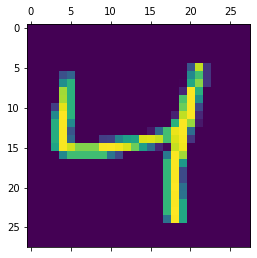

In [8]:
plt.matshow(x_train[2])

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# "scaling" - this makes the ml model's accuracy go high
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train_flattened = x_train.reshape(len(x_train),28*28)

In [12]:
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [13]:
#creating a NN
#use keras and tensorflow

# seqential = having stack of layers in NN
model = keras.Sequential([
    # keras API to define both output and input layer
    # output layer has 10 neurons
    # input layer has (28x28) 784 neurons
    # then you have to define activation function
    keras.layers.Dense(10, input_shape=(784,), activation ='sigmoid')
])

#done defining the NN

# now store it to a variable called "model", and then you have to compile the 
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',  #check documentation for diff loss funtions
    metrics = ['accuracy']  #mean - when you are compiling , goal is to make it more accurate

)

#training the model
model.fit(x_train_flattened , y_train , epochs =5)



Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.4649 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3028 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9251


In [14]:
#evaluate the model using training data set
model.evaluate(x_test_flattened , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9246


[0.2668514847755432, 0.9246000051498413]

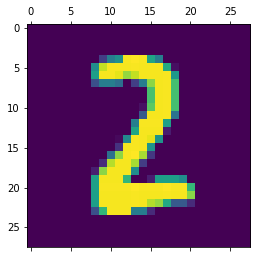

In [24]:
plt.matshow(x_test[4456])

In [25]:
y_predicted = model.predict(x_test_flattened)
y_predicted[4456]

313/313 [==============================] - 0s 1ms/step


array([1.3301818e-03, 7.6227081e-01, 9.9711692e-01, 9.4791383e-01,
       1.9681246e-07, 8.3984230e-03, 5.8073524e-02, 5.7086203e-07,
       8.6416483e-01, 5.6401946e-05], dtype=float32)

In [26]:
# we use numpy , it has function to find to find maximum value
np.argmax(y_predicted[4456])

2

In [29]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [28]:
# y_predicted values are whole values
# y_test values are integer values
# hence we have to convert y_predicted values to integers
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:4]

[7, 2, 1, 0]

In [31]:
# to check how our prediction looks like
# use confusion metrix function
cm = tf.math.confusion_matrix(labels = y_test ,  predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    8,  919,   19,   11,    5,   13,   12,   34,    5],
       [   3,    0,   16,  930,    0,   23,    3,   13,   15,    7],
       [   2,    1,    3,    2,  920,    0,   11,    5,    9,   29],
       [   9,    2,    2,   34,    8,  785,   16,    6,   24,    6],
       [  10,    3,    4,    1,    8,   15,  914,    2,    1,    0],
       [   1,    6,   22,    6,    6,    1,    0,  952,    1,   33],
       [  10,   11,    5,   33,    9,   41,    9,   13,  834,    9],
       [  11,    7,    1,   12,   28,    8,    0,   28,    2,  912]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

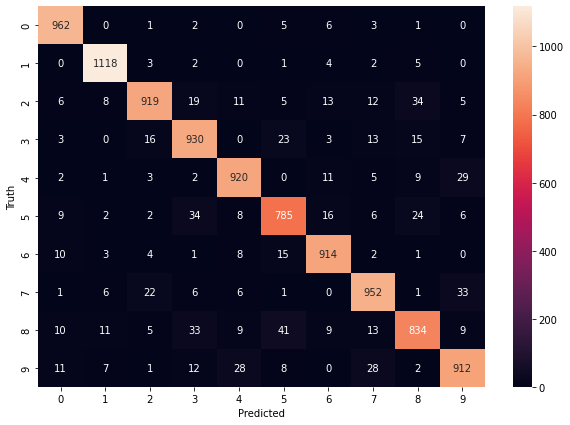

In [34]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
# copy paste the same model
# add a hidden layer
# this increase the performance of the model
model = keras.Sequential([
    #first variable is number of neurons in output layer
    # in this vase the output layer is hidden layer
    # do trial and error to figure out how many neurons are perfect
    # this should be less than input layer's neurons
    keras.layers.Dense(500, input_shape=(784,), activation ='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',  #check documentation for diff loss funtions
    metrics = ['accuracy']  #mean - when you are compiling , goal is to make it more accurate

)

model.fit(x_train_flattened , y_train , epochs =5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2005 - accuracy: 0.9414
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0803 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0531 - accuracy: 0.9827
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0377 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0268 - accuracy: 0.9911


In [40]:
model.evaluate(x_test_flattened , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9802


[0.06899400055408478, 0.9801999926567078]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

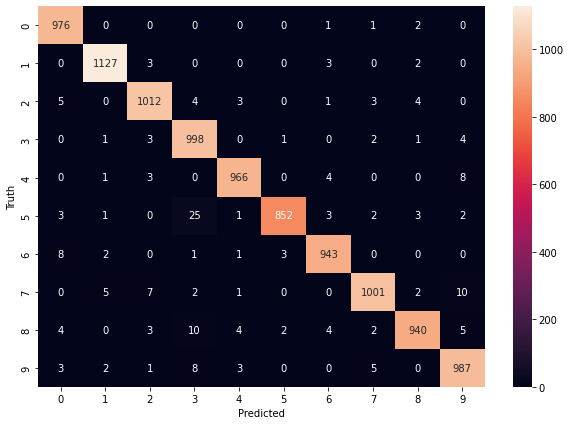

In [43]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test ,  predictions = y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')